# Esercitazione 12
L'esercitazione 12 richiede di costruire una DNN e una CNN che sappiano risolvere un problema di classificazione di cifre scritte a mano, esplorando le varie possibilità per la costruzione delle reti neurali.

##  Esercizio 12.1
Nell'esercizio devo costruire una Deep Neural Network trovando il giusto optimizer e evovlendo il sistema per un congruo numero di epoche. Dato che i dati di training e di validazione sono immagini $28\times28$ pixel, occorre che vengano prima trasformati in vettori.

In [32]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt


seed=0
np.random.seed(seed) # fisso un seed per i numeri random
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('Before reshape:')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('After reshape:')
print('X_train shape:', X_train.shape)


# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('Y_train shape:', Y_train.shape)

Before reshape:
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

After reshape:
X_train shape: (60000, 784)
Y_train shape: (60000, 10)


Si può quidi vedere che i valori di input passano da essere matrici a vettori, mentre gli output passano da essere solo un numero ad essere un vettore di 10 elementi di cui solo uno è diverso da 0, nella posizione corrispondente alla cifra che rappresenta.

Si può ora passare alla costruzione della rete: ho scelto di utilizzare _SDG_, _Adam_ e _RMSprop_ come ottimizzatori in 3 reti neurali della stessa struttura.

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model_SDG():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

def compile_model_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

def compile_model_RMSprop():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model


In [34]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN_SDG = compile_model_SDG()
model_DNN_Adam = compile_model_Adam()
model_DNN_RMSprop =compile_model_RMSprop()

# train DNN and store training info in history
print('model with SDG training: ')
history_SDG = model_DNN_SDG.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

print('model with Adam training: ')
history_Adam = model_DNN_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

print('model with RMSprop trainig: ')
history_RMSprop = model_DNN_RMSprop.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10


2023-10-29 07:13:49.762476: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.7550 - acc: 0.7789 - val_loss: 0.3118 - val_acc: 0.9151
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3782 - acc: 0.8909 - val_loss: 0.2378 - val_acc: 0.9309
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3047 - acc: 0.9133 - val_loss: 0.2006 - val_acc: 0.9413
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2602 - acc: 0.9272 - val_loss: 0.1751 - val_acc: 0.9480
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2296 - acc: 0.9353 - val_loss: 0.1583 - val_acc: 0.9512
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2068 - acc: 0.9413 - val_loss: 0.1426 - val_acc: 0.9565
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1858 - acc: 0.9469 - val_loss: 0.1303 - val_acc: 0.9590
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/st

2023-10-29 07:15:51.381896: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2913 - acc: 0.9153 - val_loss: 0.1075 - val_acc: 0.9666
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1254 - acc: 0.9647 - val_loss: 0.0874 - val_acc: 0.9734
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0902 - acc: 0.9739 - val_loss: 0.0946 - val_acc: 0.9732
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0697 - acc: 0.9792 - val_loss: 0.0852 - val_acc: 0.9761
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0560 - acc: 0.9826 - val_loss: 0.0775 - val_acc: 0.9797
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0791 - val_acc: 0.9792
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0918 - val_acc: 0.9782
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/st

2023-10-29 07:18:04.970944: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 19s 9ms/step - loss: 0.2710 - acc: 0.9216 - val_loss: 0.1407 - val_acc: 0.9644
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1487 - acc: 0.9628 - val_loss: 0.1441 - val_acc: 0.9664
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1419 - acc: 0.9693 - val_loss: 0.1177 - val_acc: 0.9759
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1429 - acc: 0.9707 - val_loss: 0.1355 - val_acc: 0.9738
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1433 - acc: 0.9715 - val_loss: 0.1414 - val_acc: 0.9764
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1493 - acc: 0.9724 - val_loss: 0.1805 - val_acc: 0.9737
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1510 - acc: 0.9727 - val_loss: 0.1944 - val_acc: 0.9754
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/st

In [28]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols) #this to do the next segment multiple times

313/313 [==============================] - 1s 4ms/step


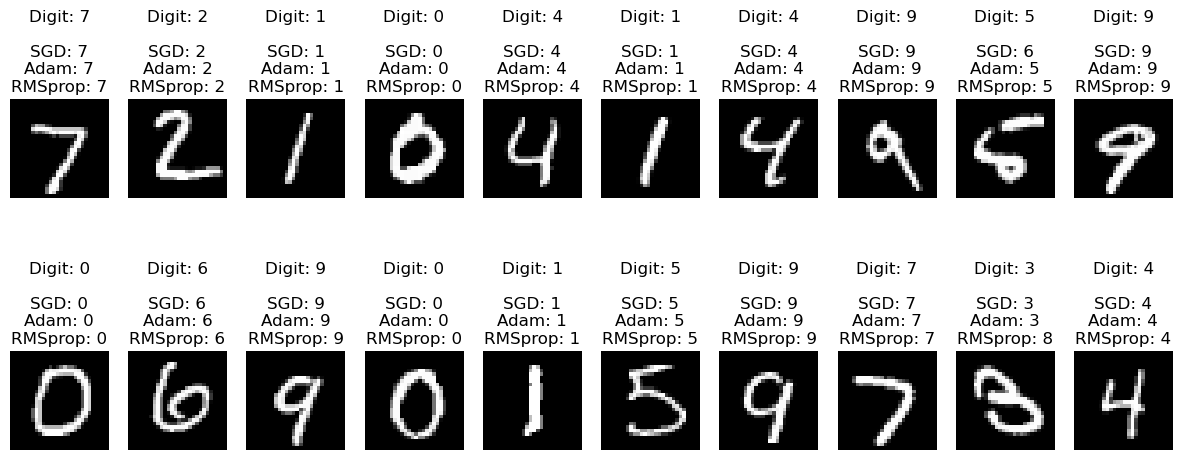

In [35]:
predictions = model_DNN_SDG.predict(X_test)
predictions2 = model_DNN_Adam.predict(X_test)
predictions3 = model_DNN_RMSprop.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 6)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Digit: {}\n\nSGD: {}\nAdam: {}\nRMSprop: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i]), np.argmax(predictions2[i]), np.argmax(predictions3[i])))        
    plt.axis('off')
plt.show()

Come si può vedere qui sopra, solo il modello con Adam è riuscito a predire correttamente tutti i numeri. Tuttavia, sia il modello con SDG che in modello con RMSprop sono comunque riusciti a predire ogni tipologia di cifra almeno una volta.

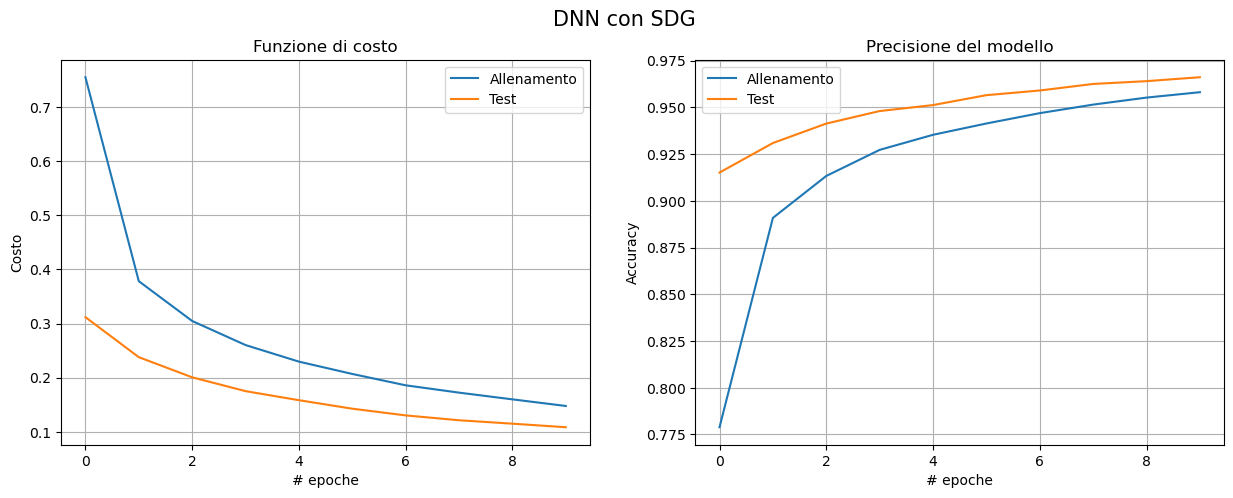

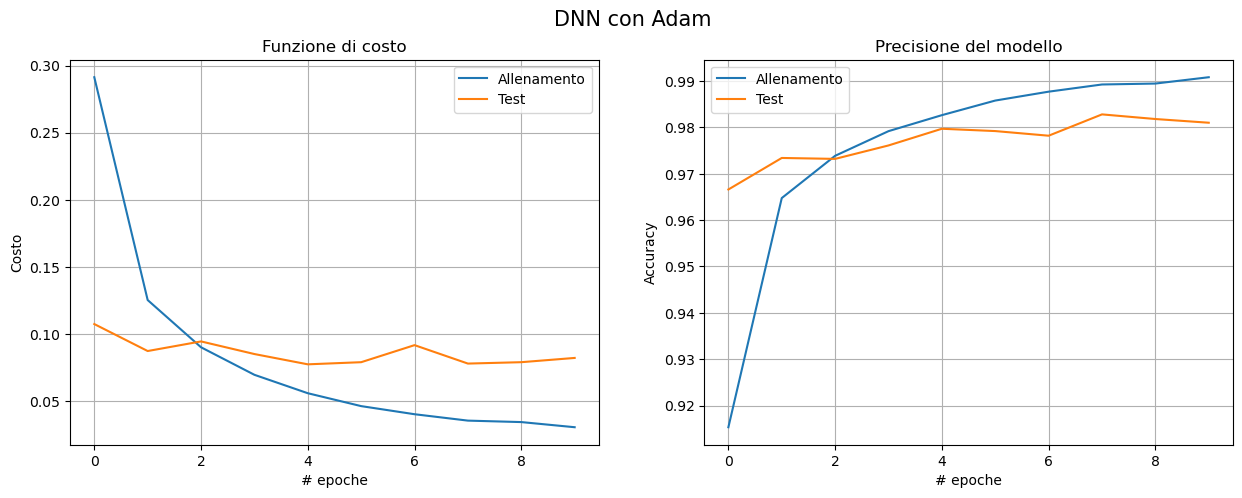

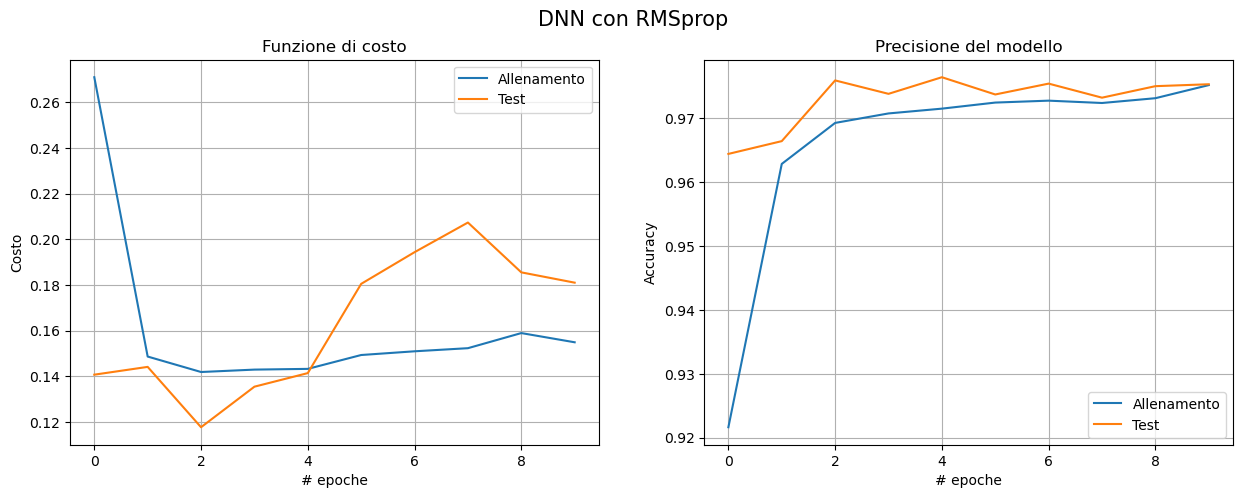

In [43]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('DNN con SDG', size=15)

ax0.plot(history_SDG.history['loss'])
ax0.plot(history_SDG.history['val_loss'])
ax0.set_title('Funzione di costo')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')
ax0.grid()

ax1.plot(history_SDG.history['acc'])
ax1.plot(history_SDG.history['val_acc'])
ax1.set_title('Precisione del modello')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('# epoche')
ax1.legend(['Allenamento', 'Test'], loc='best')
ax1.grid()

plt.show()


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('DNN con Adam', size=15)

ax0.plot(history_Adam.history['loss'])
ax0.plot(history_Adam.history['val_loss'])
ax0.set_title('Funzione di costo')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')
ax0.grid()

ax1.plot(history_Adam.history['acc'])
ax1.plot(history_Adam.history['val_acc'])
ax1.set_title('Precisione del modello')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('# epoche')
ax1.legend(['Allenamento', 'Test'], loc='best')
ax1.grid()

plt.show()


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('DNN con RMSprop', size=15)

ax0.plot(history_RMSprop.history['loss'])
ax0.plot(history_RMSprop.history['val_loss'])
ax0.set_title('Funzione di costo')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')
ax0.grid()

ax1.plot(history_RMSprop.history['acc'])
ax1.plot(history_RMSprop.history['val_acc'])
ax1.set_title('Precisione del modello')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('# epoche')
ax1.legend(['Allenamento', 'Test'], loc='best')
ax1.grid()
plt.show()

Dagli andamenti di loss e accuracy lungo le epoche di training si vede che la rete con Adam va in overfitting già dopo due epoche, e analogamente la rete con RMSprop dopo circa 4 epoche. Il modello con lo SGD invece non mostra overfitting nelle 10 epoche di allenamento fatte. Adam si mostra essere quindi l'ottimizzatore più efficiente tra quelli provati.

## Esercizio 12.2
L'esercizio richiede di costruire una Convolutional Neural Network per risolvere lo stesso problema di classificazione di prima. 

In [45]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [47]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))

    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['acc'])
    return model

In [51]:
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1693 - acc: 0.9474 - val_loss: 0.0455 - val_acc: 0.9849
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0668 - acc: 0.9799 - val_loss: 0.0389 - val_acc: 0.9872
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0506 - acc: 0.9835 - val_loss: 0.0315 - val_acc: 0.9905
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0372 - acc: 0.9880 - val_loss: 0.0264 - val_acc: 0.9918
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0313 - acc: 0.9895 - val_loss: 0.0244 - val_acc: 0.9927
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0285 - acc: 0.9905 - val_loss: 0.0252 - val_acc: 0.9923
Epoch 8/10
1875/1875 [==========================

313/313 [==============================] - 2s 5ms/step


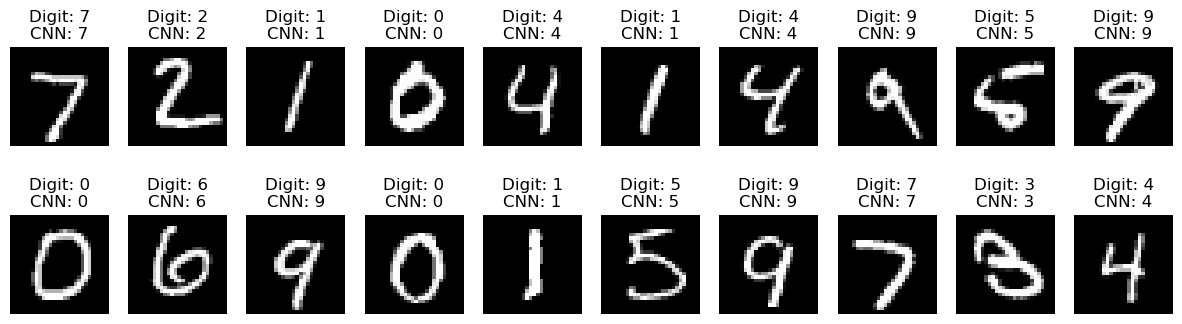

In [67]:
predictions4 = model_CNN.predict(X_test)

plt.figure(figsize=(15, 4)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    #if i<10:
    plt.title("Digit: {}\nCNN: {}".format(np.argmax(Y_test[i]), np.argmax(predictions4[i])))        
    plt.axis('off')
plt.show()



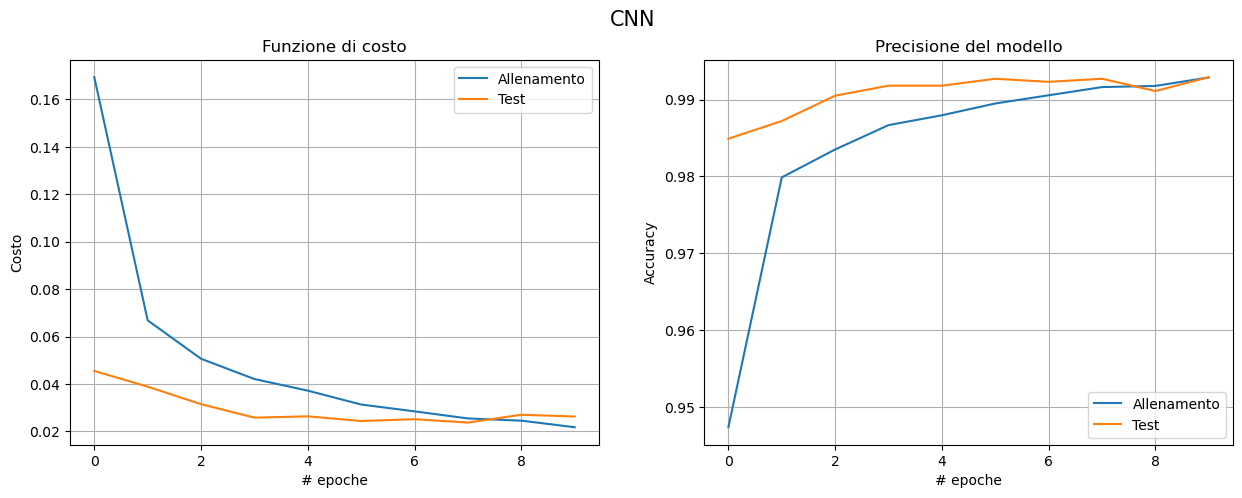

In [53]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('CNN', size=15)

ax0.plot(history_CNN.history['loss'])
ax0.plot(history_CNN.history['val_loss'])
ax0.set_title('Funzione di costo')
ax0.set_ylabel('Costo')
ax0.set_xlabel('# epoche')
ax0.legend(['Allenamento', 'Test'], loc='best')
ax0.grid()

ax1.plot(history_CNN.history['acc'])
ax1.plot(history_CNN.history['val_acc'])
ax1.set_title('Precisione del modello')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('# epoche')
ax1.legend(['Allenamento', 'Test'], loc='best')
ax1.grid()

plt.show()

## Esercizio 12.3

In [87]:
from PIL import Image
import os

digit_in = []
data = []
pix = []

for i in range(10):
    digit_filename = "./Pictures/"+str(i)+".png"
    digit_in.append(Image.open(digit_filename).convert('L'))
    ydim, xdim = digit_in[i].size
    pix.append(digit_in[i].load());
    data.append(np.zeros((xdim, ydim)))
    for j in range(ydim):
        for k in range(xdim):
            data[i][k,j]=pix[i][j,k]
    data[i] /= 255

'''
plt.figure(figsize=(5,5))
plt.imshow(data[0], cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data[9], cmap='gray')
plt.show()
'''

"\nplt.figure(figsize=(5,5))\nplt.imshow(data[0], cmap='gray')\nplt.show()\n\nplt.figure(figsize=(5,5))\nplt.imshow(data[9], cmap='gray')\nplt.show()\n"

1/1 [==============================] - 0s 25ms/step


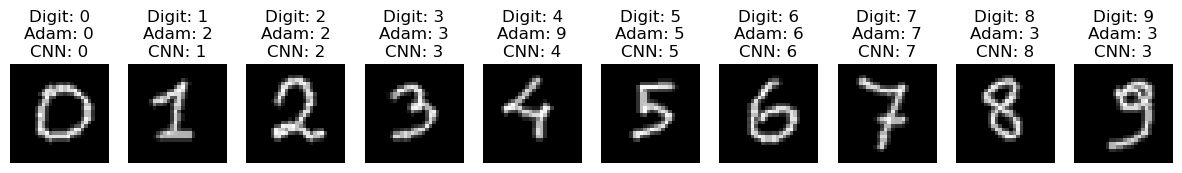

In [88]:
pred_DNN = []
pred_CNN = []


for i in range(10):
    data[i] = data[i].reshape(1,xdim,ydim,1)
    pred_CNN.append(model_CNN.predict(data[i]))
    data[i] = data[i].reshape(1,xdim*ydim)
    pred_DNN.append(model_DNN_Adam.predict(data[i]))
    data[i] = data[i].reshape(xdim,ydim)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i], cmap='gray')
    plt.title("Digit: {}\nAdam: {}\nCNN: {}".format(i, np.argmax(pred_DNN[i]), np.argmax(pred_CNN[i])))        
    plt.axis('off')
plt.show()
